In [1]:
import os
import matplotlib.pyplot as plt
from keras import Sequential
from keras.utils import image_dataset_from_directory
from keras.layers import Dense,Flatten,Dropout
from keras.applications import MobileNetV3Large
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from keras.callbacks import Callback,EarlyStopping,ReduceLROnPlateau


In [2]:

parent_dir='C:/Users/Corrupted/Desktop/OUTPUT'
train_dir = os.path.join(parent_dir,'train')
test_dir = os.path.join(parent_dir,'test')
val_dir = os.path.join(parent_dir,'val')

In [3]:
class_name = []
for image_class in os.listdir(train_dir):
    class_name.append(image_class)
print(class_name)
print(f'Total class_name: {len(class_name)}')


['high', 'low', 'medium', 'very-high', 'very-low']
Total class_name: 5


In [4]:
train_data = image_dataset_from_directory(train_dir, label_mode="categorical",
                                          image_size=(224, 224), batch_size=32,
                                          shuffle=True, seed=42)
test_data = image_dataset_from_directory(test_dir, label_mode="categorical",
                                         image_size=(224, 224), batch_size=32,
                                         shuffle=False, seed=42)
val_data = image_dataset_from_directory(val_dir, label_mode="categorical",
                                        image_size=(224, 224), batch_size=32,
                                        shuffle=False, seed=42)

Found 42418 files belonging to 5 classes.
Found 6065 files belonging to 5 classes.
Found 12117 files belonging to 5 classes.


In [5]:
early_stop = EarlyStopping(monitor="val_loss", patience=10,
                                              min_delta=0.0001)

reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2,
                                                 patience=4, min_lr=1e-7)

In [6]:
n_class = len(class_name)
model = Sequential()
pretrained_model = MobileNetV3Large(include_top=False,
                                                  input_shape=(224, 224, 3),
                                                  pooling='avg', classes=n_class-2,
                                                  weights='imagenet',classifier_activation='softmax')

for layer in pretrained_model.layers:
    layer.trainable = False

model.add(pretrained_model)

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_class, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 960)              2996352   
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 960)               0         
                                                                 
 dense (Dense)               (None, 512)               492032    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                        

In [7]:
model.compile(loss=CategoricalCrossentropy(label_smoothing=0.1),
              optimizer=Adam(learning_rate=0.01), metrics=["accuracy"])


In [8]:
hist = model.fit(train_data, epochs=100, validation_data=val_data,
                 callbacks=[early_stop,reduce_lr])

Epoch 1/100
1326/1326 [==============================] - 355s 259ms/step - loss: 1.0332 - accuracy: 0.6507 - val_loss: 0.9298 - val_accuracy: 0.7060 - lr: 0.0100
Epoch 2/100
1326/1326 [==============================] - 300s 225ms/step - loss: 0.9669 - accuracy: 0.6878 - val_loss: 0.9400 - val_accuracy: 0.7034 - lr: 0.0100
Epoch 3/100
1326/1326 [==============================] - 309s 232ms/step - loss: 0.9548 - accuracy: 0.6996 - val_loss: 0.9172 - val_accuracy: 0.7234 - lr: 0.0100
Epoch 4/100
1326/1326 [==============================] - 308s 231ms/step - loss: 0.9558 - accuracy: 0.6995 - val_loss: 0.8911 - val_accuracy: 0.7310 - lr: 0.0100
Epoch 5/100
1326/1326 [==============================] - 297s 223ms/step - loss: 0.9430 - accuracy: 0.7089 - val_loss: 0.8865 - val_accuracy: 0.7329 - lr: 0.0100
Epoch 6/100
1326/1326 [==============================] - 295s 222ms/step - loss: 0.9335 - accuracy: 0.7149 - val_loss: 0.8969 - val_accuracy: 0.7378 - lr: 0.0100
Epoch 7/100
1326/1326 [=====

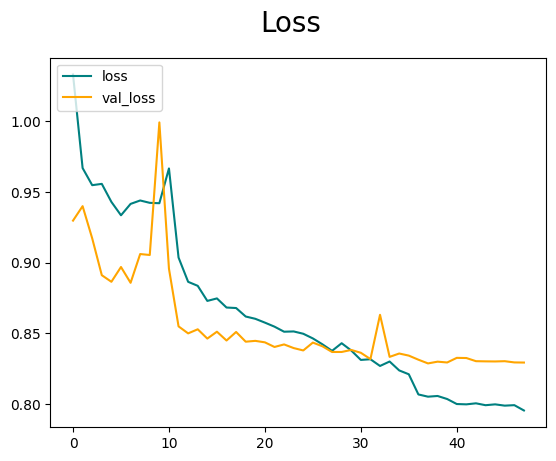

In [9]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

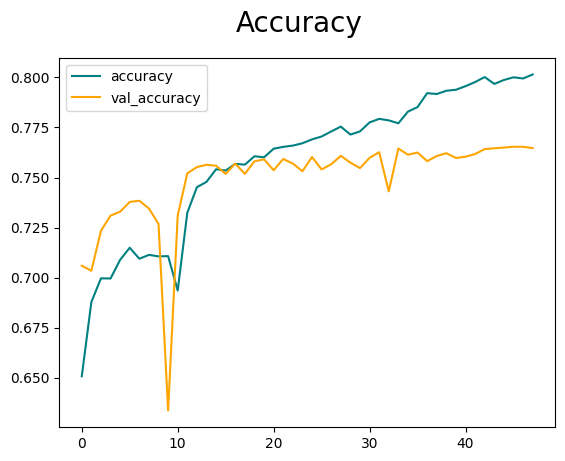

In [10]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [11]:
print(f"Training Accuracy: {hist.history['accuracy'][-1]}")
print(f"Validation Accuracy: {hist.history['val_accuracy'][-1]}")

Training Accuracy: 0.8014993667602539
Validation Accuracy: 0.7647107243537903


In [15]:
test_loss, test_acc = model.evaluate(test_data)
print(f'Test Loss: {test_loss}\nTest Accuracy: {test_acc}')

190/190 [==============================] - 35s 183ms/step - loss: 0.8087 - accuracy: 0.7746
Test Loss: 0.8086979389190674
Test Accuracy: 0.7746084332466125


In [13]:
# import time
# times=time.strftime("%Y%m%d-%H%M%S")
# file_name='MY_EfficientNetV2_0 .ipynb'
# times=str(file_name.split('.')[0]+'_')+times
# !jupyter nbconvert --to html $file_name --output $times --output-dir=./html_model

In [14]:
model.save('aft77/')

INFO:tensorflow:Assets written to: aft77/assets


INFO:tensorflow:Assets written to: aft77/assets
